In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

Datadir = "/content/drive/MyDrive/Assessment"
Categories = ["crpf","bsf","j&k"]

for category in Categories:
  path = os.path.join(Datadir, category)
  for Img in os.listdir(path):
    Img_array = cv2.imread(os.path.join(path,Img),cv2.IMREAD_GRAYSCALE)

print("success")

success


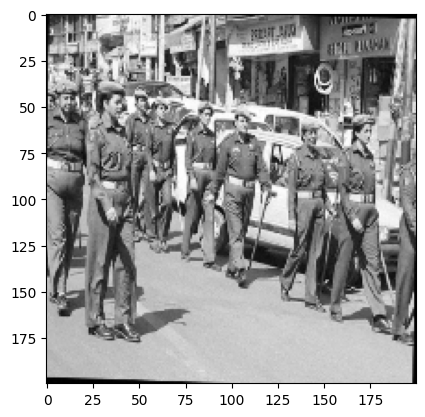

In [3]:
Img_size = 200

new_array = cv2.resize(Img_array,(Img_size,Img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [4]:
training_data = []
def create_training_data():
  for category in Categories:
    path = os.path.join(Datadir, category)
    class_num = Categories.index(category)
    for Img in os.listdir(path):
      try:
        vid_array = cv2.imread(os.path.join(path,Img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(vid_array,(Img_size,Img_size))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

create_training_data()

In [5]:
import random
random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
  print(sample[1])

1
0
0
1
2
1
1
2
0
2


In [7]:
X = []
y = []
for features,label in training_data:
  X.append(features)
  y.append(label)
# vid_size = 150
X = np.array(X).reshape(-1, Img_size,Img_size, 1)
y = np.array(y)

In [8]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [9]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from tensorflow.keras.callbacks import TensorBoard
import time
NAME = "Assessment-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

model = Sequential()
model.add(Conv2D(64,(3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])

model.fit(X, y, batch_size = 1, epochs=300, validation_split = 0.1, callbacks=[tensorboard])

Epoch 1/300
113/113 [==============================] - 3s 6ms/step - loss: 0.5862 - accuracy: 0.3540 - val_loss: 0.4835 - val_accuracy: 0.2308
Epoch 2/300
113/113 [==============================] - 1s 5ms/step - loss: 0.4758 - accuracy: 0.3451 - val_loss: 0.0813 - val_accuracy: 0.2308
Epoch 3/300
113/113 [==============================] - 1s 5ms/step - loss: 0.4245 - accuracy: 0.3540 - val_loss: 0.1035 - val_accuracy: 0.2308
Epoch 4/300
113/113 [==============================] - 1s 5ms/step - loss: 14.4417 - accuracy: 0.3451 - val_loss: -0.0282 - val_accuracy: 0.2308
Epoch 5/300
113/113 [==============================] - 0s 4ms/step - loss: 0.2057 - accuracy: 0.3451 - val_loss: 0.0652 - val_accuracy: 0.2308
Epoch 6/300
113/113 [==============================] - 1s 5ms/step - loss: 1.0166 - accuracy: 0.3451 - val_loss: 0.1720 - val_accuracy: 0.2308
Epoch 7/300
113/113 [==============================] - 1s 5ms/step - loss: 0.3503 - accuracy: 0.3451 - val_loss: 0.1146 - val_accuracy: 0.23

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 64)      640       
                                                                 
 activation_6 (Activation)   (None, 198, 198, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 97, 97, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                  

In [ ]:
model.save('uniform.model')
#tf.keras.models.save_model(model, "saved_model.hp5", save_format="h5")

1/1 [==============================] - 0s 87ms/step


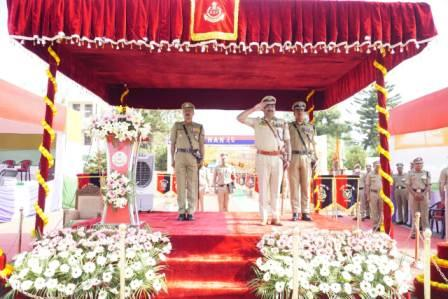

0
other class found


In [ ]:
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow
Categories = ["crpf","bsf","j&k"]

def prepare(filepath):
  Img_size = 200
  Img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  new_array=cv2.resize(Img_array,(Img_size,Img_size))
  return new_array.reshape(-1,Img_size,Img_size,1)

model = tf.keras.models.load_model("uniform.model")

prediction = model.predict([prepare('/content/img22.jpg')])
# face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
img = cv2.imread('/content/img22.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# faces = face_cascade.detectMultiScale(gray, 1.1,4)
# for (x,y,w,h) in faces:
#   cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,0),2)
cv2_imshow(img)
cv2.waitKey()
#print(Categories[int(prediction[0][0])])
print(int(prediction))
if int(prediction==0):
  print("crpf")
elif int(prediction==1):
  print("bsf")
elif int(prediction==2):
  print("j&k")
else:
  print("other class found")